In [48]:
# Import beberapa library
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# Untuk memvisualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
def convert_excel_to_csv(excel_file,csv_file):
  # Baca file Excel menggunakan pandas
  data_frame = pd.read_excel(excel_file)

  # Konversi data frame menjadi file CSV
  data_frame.to_csv(csv_file,index=False)
excel_file = "sample_data/data_mahasiswa.xlsx"
csv_file = "sample_data/data_mahasiswa.csv"
convert_excel_to_csv(excel_file,csv_file)

In [50]:
data = pd.read_csv('sample_data/data_mahasiswa.csv')

In [51]:
data.head(10)

,No,NIM,NAMA,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan
0,1.0,193303030001,Sallyana Yek,4.0,3.74,"3,55",3.90,4.00,lulus
1,2.0,193303030002,Anthony,4.0,3.74,"4,0",3.85,3.95,tidak lulus
2,3.0,193303030003,William Chandra,3.45,3.61,3.27,3.79,3.64,tidak lulus
3,4.0,193303030004,Valentino Damar,4.0,3.61,3.89,3.65,3.80,tidak lulus
4,5.0,193303030005,Nicholas Livando,4.0,3.74,3.94,3.80,3.77,tidak lulus
5,6.0,193303030006,Alvin Rasid,4.0,3.61,"4,0",3.90,4.00,tidak lulus
6,7.0,193303030009,Matthew Evan Phanie,"4,0",3.61,3.89,3.90,4.00,tidak lulus
7,8.0,193303030011,Michael,3.75,3.43,3.83,3.47,3.91,tidak lulus
8,9.0,193303030012,Windy Candra,3.5,3.74,3.9,3.70,4.00,tidak lulus
9,10.0,193303030014,Steven Lie,3.69,3.26,3.89,4.00,3.59,tidak lulus


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                88 non-null     float64
 1   NIM               277 non-null    int64  
 2   NAMA              277 non-null    object 
 3   IPS (semester 1)  277 non-null    object 
 4   IPS (semester 2)  277 non-null    float64
 5   IPS (semester 3)  276 non-null    object 
 6   IPS (semester 4)  277 non-null    float64
 7   IPS (semester 5)  274 non-null    float64
 8   kelulusan         277 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 19.6+ KB


In [53]:
data.drop('No',axis=1,inplace=True)
data.drop('NAMA',axis=1,inplace=True)
data.drop('NIM',axis=1,inplace=True)

In [54]:
total_jumlah_data_sebelum_dibersihkan = len(data)
print("Jumlah keseluruhan data sebelum dibersihkan = ",total_jumlah_data_sebelum_dibersihkan)

Jumlah keseluruhan data sebelum dibersihkan =  277


In [55]:
data.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan
0,4.0,3.74,"3,55",3.90,4.00,lulus
1,4.0,3.74,"4,0",3.85,3.95,tidak lulus
2,3.45,3.61,3.27,3.79,3.64,tidak lulus
3,4.0,3.61,3.89,3.65,3.80,tidak lulus
4,4.0,3.74,3.94,3.80,3.77,tidak lulus
5,4.0,3.61,"4,0",3.90,4.00,tidak lulus
6,"4,0",3.61,3.89,3.90,4.00,tidak lulus
7,3.75,3.43,3.83,3.47,3.91,tidak lulus
8,3.5,3.74,3.9,3.70,4.00,tidak lulus
9,3.69,3.26,3.89,4.00,3.59,tidak lulus


In [56]:
# Mengecek apakah ada data yang null atau tidak
data.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    1
IPS (semester 4)    0
IPS (semester 5)    3
kelulusan           0
dtype: int64

In [57]:
# Membersihakan data yang null
data_clean = data.dropna()

In [58]:
data_clean.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
kelulusan           0
dtype: int64

In [59]:
# Mengecek data duplicated
data_clean.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Length: 273, dtype: bool

In [60]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 276
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  273 non-null    object 
 1   IPS (semester 2)  273 non-null    float64
 2   IPS (semester 3)  273 non-null    object 
 3   IPS (semester 4)  273 non-null    float64
 4   IPS (semester 5)  273 non-null    float64
 5   kelulusan         273 non-null    object 
dtypes: float64(3), object(3)
memory usage: 14.9+ KB


In [61]:
# Mengecek apakah ada data yang duplicated
data_clean.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Length: 273, dtype: bool

In [62]:
# Mengubah data "Lulus" menjadi 1 dan "Tidak Lulus" menjadi 0
data_clean['kelulusan'] = data_clean['kelulusan'].map({'lulus': 1, 'tidak lulus': 0})

<ipython-input-62-ec98cc9a3842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['kelulusan'] = data_clean['kelulusan'].map({'lulus': 1, 'tidak lulus': 0})


In [63]:
data_clean.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan
0,4.0,3.74,"3,55",3.90,4.00,1
1,4.0,3.74,"4,0",3.85,3.95,0
2,3.45,3.61,3.27,3.79,3.64,0
3,4.0,3.61,3.89,3.65,3.80,0
4,4.0,3.74,3.94,3.80,3.77,0
5,4.0,3.61,"4,0",3.90,4.00,0
6,"4,0",3.61,3.89,3.90,4.00,0
7,3.75,3.43,3.83,3.47,3.91,0
8,3.5,3.74,3.9,3.70,4.00,0
9,3.69,3.26,3.89,4.00,3.59,0


In [64]:
data_clean = pd.DataFrame(data_clean)

In [65]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 276
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  273 non-null    object 
 1   IPS (semester 2)  273 non-null    float64
 2   IPS (semester 3)  273 non-null    object 
 3   IPS (semester 4)  273 non-null    float64
 4   IPS (semester 5)  273 non-null    float64
 5   kelulusan         273 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 14.9+ KB


In [66]:
# Mengkonversi data string ke float
data_clean['IPS (semester 1)'] = pd.to_numeric(data_clean['IPS (semester 1)'],errors='coerce')
data_clean['IPS (semester 3)'] = pd.to_numeric(data_clean['IPS (semester 3)'], errors='coerce')

In [67]:
data_clean.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan
0,4.00,3.74,NaN,3.90,4.00,1
1,4.00,3.74,NaN,3.85,3.95,0
2,3.45,3.61,3.27,3.79,3.64,0
3,4.00,3.61,3.89,3.65,3.80,0
4,4.00,3.74,3.94,3.80,3.77,0
5,4.00,3.61,NaN,3.90,4.00,0
6,NaN,3.61,3.89,3.90,4.00,0
7,3.75,3.43,3.83,3.47,3.91,0
8,3.50,3.74,3.90,3.70,4.00,0
9,3.69,3.26,3.89,4.00,3.59,0


In [68]:
data_clean['IPS (semester 1)'].fillna(4.0,inplace=True)
data_clean['IPS (semester 3)'].fillna(4.0,inplace=True)

In [69]:
data_clean.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
kelulusan           0
dtype: int64

In [70]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 276
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  273 non-null    float64
 1   IPS (semester 2)  273 non-null    float64
 2   IPS (semester 3)  273 non-null    float64
 3   IPS (semester 4)  273 non-null    float64
 4   IPS (semester 5)  273 non-null    float64
 5   kelulusan         273 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.9 KB


In [71]:
total_data = len(data_clean)
print("Jumlah keseluruhan data = ",total_data)
total_data_yang_hilang = total_jumlah_data_sebelum_dibersihkan - total_data
print("Jumlah data yang hilang = ",total_data_yang_hilang)

Jumlah keseluruhan data =  273
Jumlah data yang hilang =  4


In [72]:
X = data_clean[data_clean.columns[:5]]
print(X)

     IPS (semester 1)  IPS (semester 2)  IPS (semester 3)  IPS (semester 4)  \
0                4.00              3.74              4.00              3.90   
1                4.00              3.74              4.00              3.85   
2                3.45              3.61              3.27              3.79   
3                4.00              3.61              3.89              3.65   
4                4.00              3.74              3.94              3.80   
..                ...               ...               ...               ...   
272              3.09              3.47              3.63              2.82   
273              3.14              3.63              3.84              3.00   
274              3.52              4.00              4.00              3.73   
275              3.24              3.79              3.58              3.55   
276              4.00              4.00              3.84              3.55   

     IPS (semester 5)  
0                4.00  
1  

In [73]:
y = data_clean['kelulusan']
print(y)

0      1
1      0
2      0
3      0
4      0
      ..
272    1
273    1
274    1
275    1
276    1
Name: kelulusan, Length: 273, dtype: int64


In [74]:
# Membagi dataset menjadi data latih dan data uji => data latih 70% data testing 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [75]:
data_latih = len(X_train)
data_latih_y = len(y_train)
print("Jumlah data latih X_train = ",data_latih)
print("Jumlah data latih y_train = ",data_latih_y)

Jumlah data latih X_train =  191
Jumlah data latih y_train =  191


In [76]:
data_testing = len(X_test)
data_testing_y = len(y_test)
print("Jumlah data testing X_test = ",data_testing)
print("Jumlah data testing y_test = ",data_testing_y)

Jumlah data testing X_test =  82
Jumlah data testing y_test =  82


In [77]:
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
# Mengompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_test,y_test),verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 26ms/step - loss: 0.5010 - accuracy: 0.8063 - val_loss: 0.3553 - val_accuracy: 0.8902
Epoch 2/100
20/20 [==============================] - 0s 16ms/step - loss: 0.4497 - accuracy: 0.8482 - val_loss: 0.3469 - val_accuracy: 0.8902
Epoch 3/100
20/20 [==============================] - 0s 16ms/step - loss: 0.4418 - accuracy: 0.8482 - val_loss: 0.3484 - val_accuracy: 0.8902
Epoch 4/100
20/20 [==============================] - 0s 15ms/step - loss: 0.4223 - accuracy: 0.8482 - val_loss: 0.3410 - val_accuracy: 0.8902
Epoch 5/100
20/20 [==============================] - 0s 17ms/step - loss: 0.4045 - accuracy: 0.8482 - val_loss: 0.3962 - val_accuracy: 0.8902
Epoch 6/100
20/20 [==============================] - 0s 16ms/step - loss: 0.4305 - accuracy: 0.8534 - val_loss: 0.2753 - val_accuracy: 0.8902
Epoch 7/100
20/20 [==============================] - 0s 15ms/step - loss: 0.4007 - accuracy: 0.8534 - val_loss: 0.2560 - val_accuracy: 0.8902
Epoch 

# Membuat data testing dengan menggunakan model AAN

In [80]:
# Evaluasi model pada data uji
_, accuracy_testing = model.evaluate(X_test, y_test)
print('Akurasi: %.2f' % (accuracy_testing * 100))

3/3 [==============================] - 0s 8ms/step - loss: 0.3449 - accuracy: 0.9268
Akurasi: 92.68


In [81]:
y_pred_testing = model.predict(X_test)

3/3 [==============================] - 0s 5ms/step


## Membuat confusion matrix dengan menggunakan model AAN pada data testing

In [82]:
y_pred_round = y_pred_testing.round()

In [83]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred_round)

In [84]:
print(cm_test)

[[ 3  6]
 [ 0 73]]


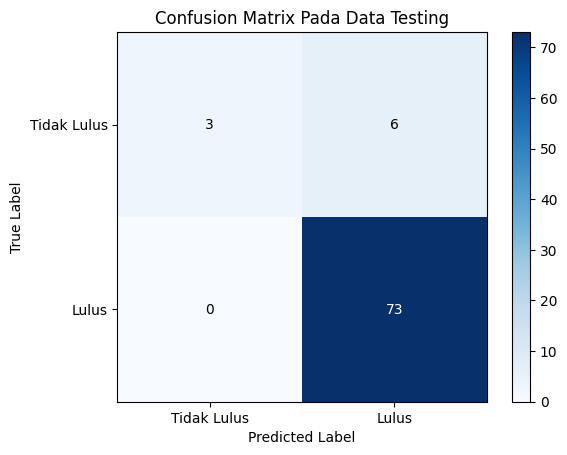

In [85]:
labels = ['Tidak Lulus', 'Lulus']
fig, ax = plt.subplots()
im = ax.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_test.shape[1]),
       yticks=np.arange(cm_test.shape[0]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix Pada Data Testing',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = cm_test.max() / 2
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        ax.text(j, i, format(cm_test[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_test[i, j] > thresh else "black")

plt.show()

In [86]:
# Menghitung metrics pada data
from sklearn.metrics import classification_report
report_data_testing = classification_report(y_test,y_pred_round)

In [87]:
print("Laporan metrics pada data testing \n",report_data_testing)

Laporan metrics pada data testing 
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.92      1.00      0.96        73

    accuracy                           0.93        82
   macro avg       0.96      0.67      0.73        82
weighted avg       0.93      0.93      0.91        82



# Menguji algoritma AAN dengan menggunakan data latih

In [88]:
_, accuracy_train = model.evaluate(X_train, y_train)
print('Akurasi: %.2f' % (accuracy_train * 100))

6/6 [==============================] - 0s 9ms/step - loss: 0.3267 - accuracy: 0.9058
Akurasi: 90.58


In [89]:
y_pred_training = model.predict(X_train)

6/6 [==============================] - 0s 6ms/step


In [90]:
y_pred_train_round = y_pred_training.round()

## Membuat Confusion Matriks Dengan Algoritma AAN menggunakan data latih

In [92]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train_round)

In [93]:
print(cm_train)

[[ 12  17]
 [  1 161]]


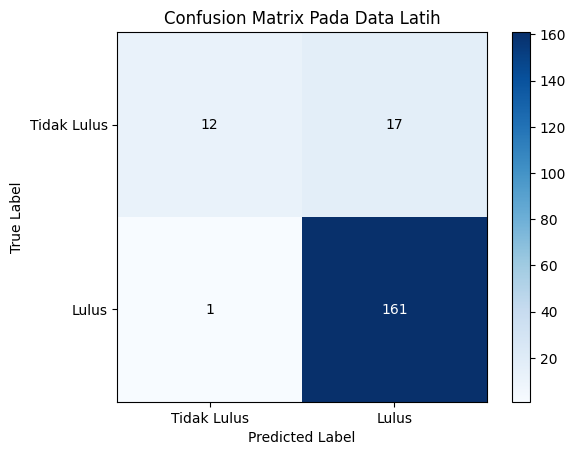

In [94]:
labels = ['Tidak Lulus', 'Lulus']
fig, ax = plt.subplots()
im = ax.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_train.shape[0]),
       yticks=np.arange(cm_train.shape[1]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix Pada Data Latih',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = cm_train.max() / 2
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        ax.text(j, i, format(cm_train[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_train[i, j] > thresh else "black")

In [95]:
# Membuat Laporan metrics untuk data latih AAN
from sklearn.metrics import classification_report
report_data_latih = classification_report(y_train,y_pred_train_round)

In [96]:
print("Laporan metrics data latih dengan menggunakan model AAN \n ",report_data_latih)

Laporan metrics data latih dengan menggunakan model AAN 
                precision    recall  f1-score   support

           0       0.92      0.41      0.57        29
           1       0.90      0.99      0.95       162

    accuracy                           0.91       191
   macro avg       0.91      0.70      0.76       191
weighted avg       0.91      0.91      0.89       191

